# downscaling using coherence and angle
Algorithm: break image into *k* by *k* blocks, and create image with dimensions (h/k, w/k) with each pixel representing the max coherence and associated angle

In [1]:
import numpy as np
from modules_no_st import coh_ang_calc, orient_hsv
import cv2 as cv
import matplotlib.pyplot as plt
from skimage.color import rgb2gray

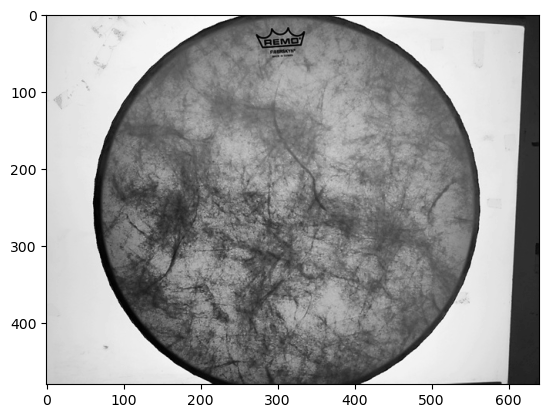

In [2]:
drumhead = rgb2gray(cv.imread("drumhead.jpg"))
plt.imshow(drumhead, cmap='gray')

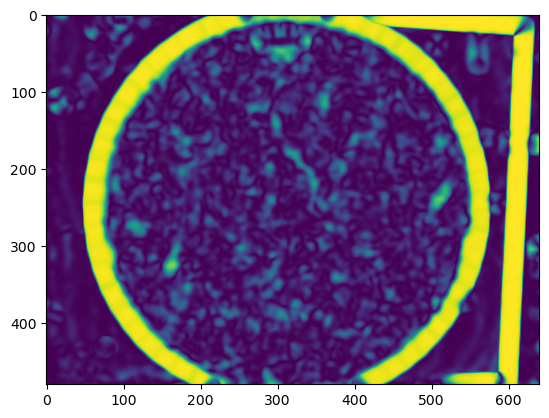

In [3]:
coherence, angle = coh_ang_calc(drumhead, epsilon=.1, sigma_inner=4)
plt.imshow(coherence)

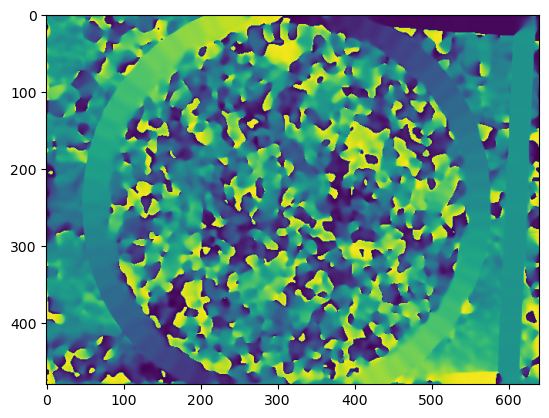

In [4]:
plt.imshow((angle + np.pi)/(np.pi * 2))

In [5]:
coherence.shape

(480, 640)

In [47]:
def downscale_coh_ang(coherence, angle, k):
    (h, w) = coherence.shape
    h_small = h//k
    w_small = w//k

    coherence_clipped = coherence[:h_small * k, :w_small * k]
    angle_clipped = angle[:h_small * k, :w_small * k]

    coherence_small = coherence_clipped.reshape(h_small, k, w_small, k).mean(axis=(1, 3))
    
    angle_reshaped = angle_clipped.reshape(h_small, k, w_small, k)

    max_col_indices = coherence_clipped.reshape(h_small, k, w_small, k).max(axis=1).argmax(axis=2) # shape (h_small, k, w_small)
    max_row_indices = coherence_clipped.reshape(h_small, k, w_small, k).max(axis=3).argmax(axis=1)


    angle_small = angle_reshaped[np.arange(h_small)[:, None], max_row_indices, np.arange(w_small), max_col_indices]
    # print(h_small, w_small)
    # print(max_row_indices.shape, max_col_indices.shape, angle_small.shape)

    return coherence_small, angle_small
    # coherence_small = np.zeros((h_small, w_small))
    # angle_small = np.zeros((h_small, w_small))

    # for r_small in range(0, h_small):
    #     for c_small in range(0, w_small):
    #         neighborhood_coherence = coherence_clipped[r_small*k:(r_small+1)*k, c_small*k:(c_small+1)*k]
    #         neighborhood_angle = angle_clipped[r_small*k:(r_small+1)*k, c_small*k:(c_small+1)*k]
    #         r_max, c_max = np.unravel_index(np.argmax(neighborhood_coherence), neighborhood_coherence.shape)
    #         coherence_small[r_small, c_small] = neighborhood_coherence.mean()
    #         angle_small[r_small, c_small] = neighborhood_angle[r_max, c_max]
    # return coherence_small, angle_small
    

In [48]:
coh_small, ang_small = downscale_coh_ang(coherence, angle, 20)

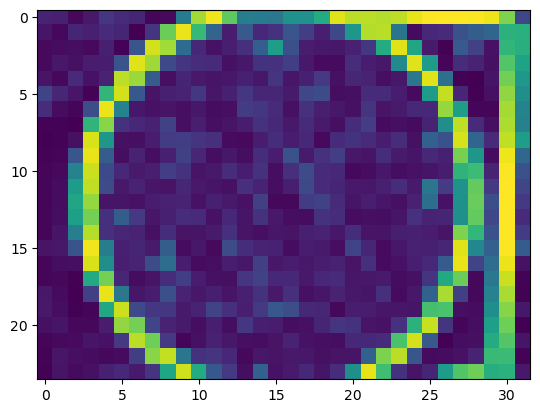

In [49]:
plt.imshow(coh_small)

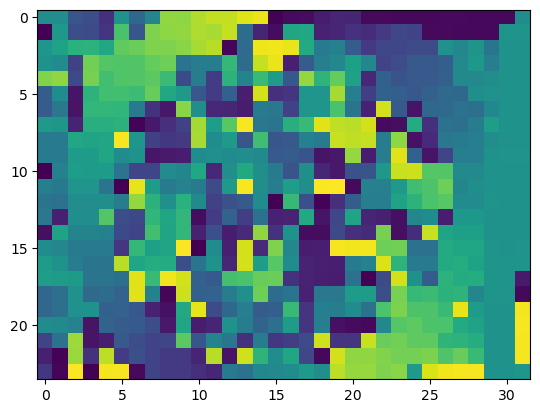

In [50]:
plt.imshow(ang_small)

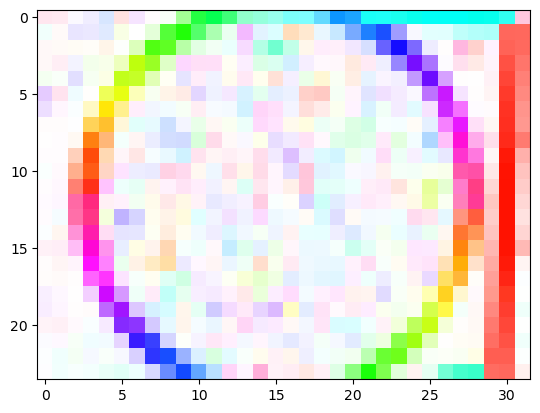

In [51]:
plt.imshow(orient_hsv(np.zeros_like(coh_small), coh_small, ang_small, mode="angle"))

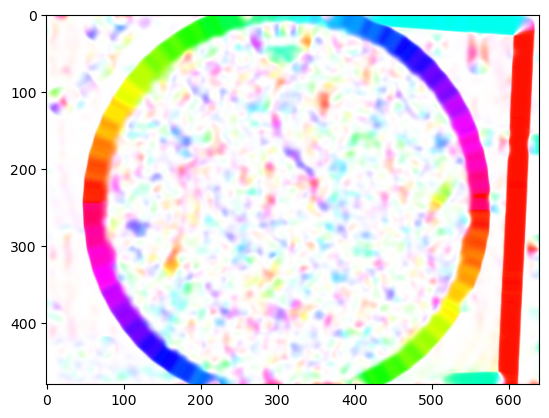

In [126]:
plt.imshow(orient_hsv(drumhead, coherence, angle, mode="angle"))

TypeError: list indices must be integers or slices, not range